In [60]:
library(rstan)

In [61]:
tot_vaccine <- 18198
tot_placebo <- 18325
patient <- c(rep("Vaccine", tot_vaccine),
             rep("Placebo", tot_placebo))
# Number of patients tested postive after RCT:
pos_vaccine <- 8
pos_placebo <- 162
tested   <- c(rep("Pos", pos_vaccine),
              rep("Neg", tot_vaccine - pos_vaccine),
              rep("Pos", pos_placebo),
              rep("Neg", tot_placebo - pos_placebo))
pfizer.tb <- tibble::tibble(tested = tested, patient=patient)
table(pfizer.tb[[2]], pfizer.tb[[1]])

         
            Neg   Pos
  Placebo 18163   162
  Vaccine 18190     8

In [62]:
dataList = list(
    tested = ifelse(pfizer.tb$tested == "Neg", 0, 1),
    patient = as.integer(factor(pfizer.tb$patient)),
    Ntot = nrow(pfizer.tb) ,
    Nclass = nlevels(factor(pfizer.tb$patient))
)

In [69]:
modelString = "
  data {
    int<lower=0> Ntot;
    int<lower=0> Nclass;
    int tested[Ntot];
    int patient[Ntot];
  }
  parameters {
    for(int k = 0; k < Nclass; k++ ){
      real<lower=0,upper=1> theta[k];
  }
  model {
    for ( int k = 0; k < Nclass; k++ ){
      theta[k] ~ beta(3,100);
      tested[k] ~ bernoulli(theta[patient[k]]);
    }
  }"
writeLines(modelString , con="stan_Pfizer_model.txt")

In [70]:
stanDso <- stan_model(model_code = modelString)

SYNTAX ERROR, MESSAGE(S) FROM PARSER:

 error in 'modelef210405d06_530d98d2bc660a9d983734281ee75994' at line 9, column 4

  -------------------------------------------------

     7:   }

     8:   parameters {

     9:     for(int k = 0; k < Nclass; k++ ){

           ^

    10:       real<lower=0,upper=1> theta[k];

  -------------------------------------------------



PARSER EXPECTED: <one of the following:

  a variable declaration, beginning with type,

      (int, real, vector, row_vector, matrix, unit_vector,

       simplex, ordered, positive_ordered,

       corr_matrix, cov_matrix,

       cholesky_corr, cholesky_cov

  or '}' to close variable declarations>



ERROR: Error in stanc(file = file, model_code = model_code, model_name = model_name, : failed to parse Stan model '530d98d2bc660a9d983734281ee75994' due to the above error.


In [7]:
stanFit <- sampling(object=stanDso ,
                    data = dataList ,
                    chains = 4 ,
                    iter = 1000 ,
                    warmup = 200 ,
                    thin = 1)


SAMPLING FOR MODEL 'cf7c1ba378e7c8a192065ca4c899770d' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000228 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 2.28 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.073822 seconds (Warm-up)
Chain 1:                0.230097 seconds (Sampling)
Chai

In [37]:
?stanfit

In [10]:
print(stanFit)

Inference for Stan model: cf7c1ba378e7c8a192065ca4c899770d.
4 chains, each with iter=1000; warmup=200; thin=1; 
post-warmup draws per chain=800, total post-warmup draws=3200.

          mean se_mean   sd    2.5%      25%      50%      75%    97.5% n_eff
theta     0.00    0.00 0.00     0.0     0.00     0.00     0.00     0.01  1231
lp__  -1099.56    0.02 0.73 -1101.6 -1099.73 -1099.29 -1099.09 -1099.04  1676
      Rhat
theta    1
lp__     1

Samples were drawn using NUTS(diag_e) at Mon Jun 21 07:46:37 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



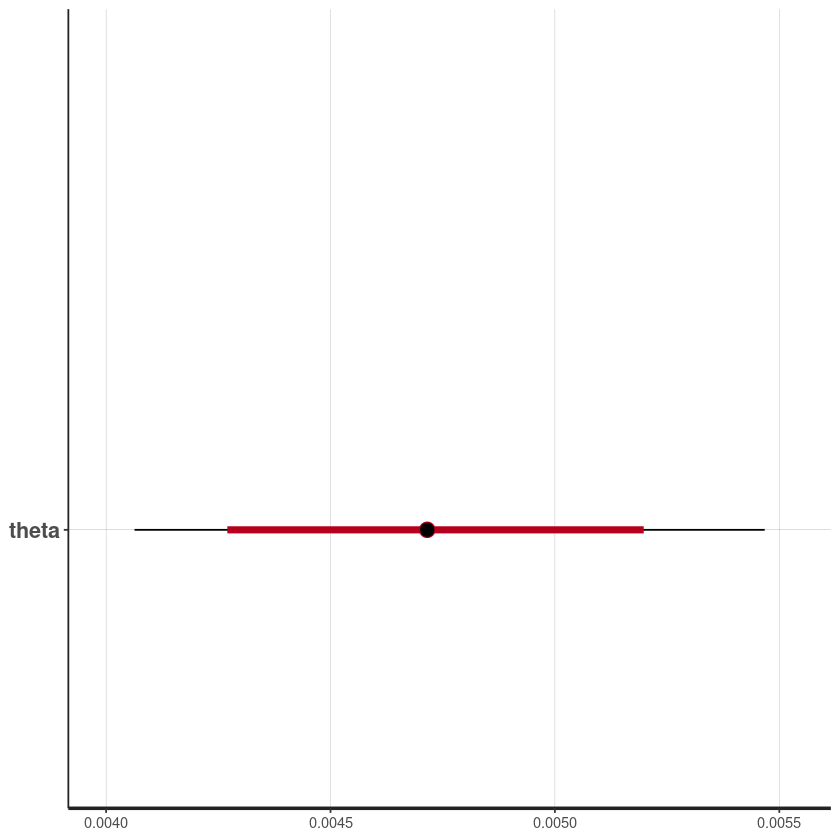

In [11]:
plot(stanFit)

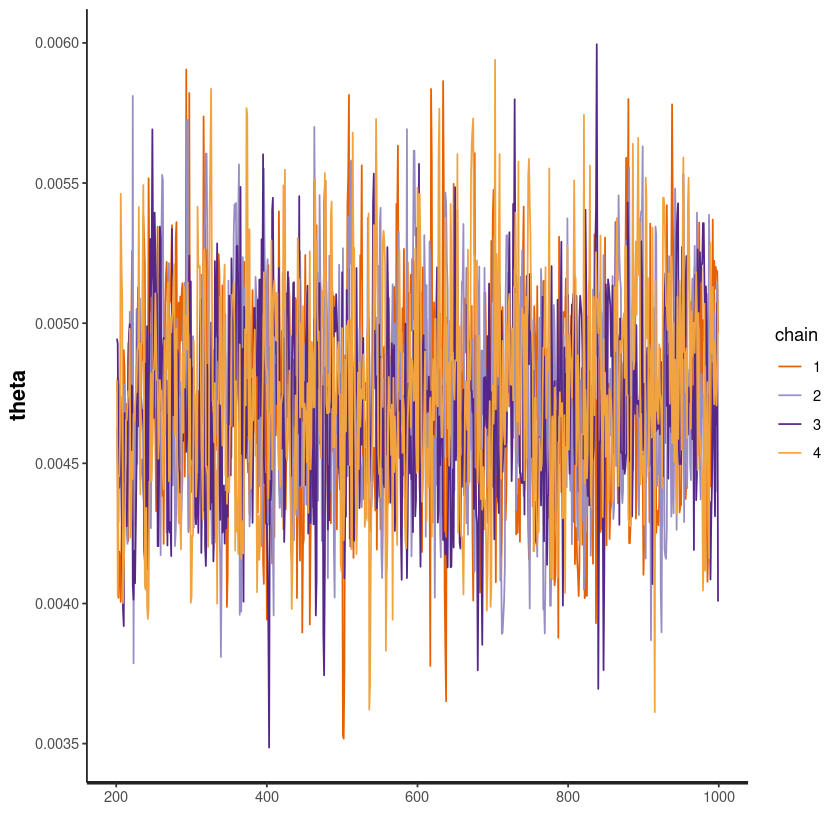

In [12]:
traceplot(stanFit)

In [17]:
ainfo <- get_adaptation_info(stanFit)
cat(ainfo[[1]])

# Adaptation terminated
# Step size = 1.50268
# Diagonal elements of inverse mass matrix:
# 0.00245131


In [18]:
extract(stanFit)

$theta
   [1] 0.004456857 0.005195899 0.005117956 0.005017070 0.005505888 0.004934802
   [7] 0.004844280 0.004816697 0.005207556 0.004790841 0.004683790 0.004982101
  [13] 0.004441610 0.004876423 0.004547439 0.004773130 0.005068143 0.005508134
  [19] 0.004790207 0.004613522 0.004560792 0.004386151 0.004685506 0.004295036
  [25] 0.004252189 0.004512907 0.004882800 0.005141289 0.005025951 0.005257573
  [31] 0.004596046 0.004752423 0.005175234 0.004599458 0.004898608 0.004669682
  [37] 0.004517071 0.004787491 0.004340188 0.005242983 0.004458333 0.005222380
  [43] 0.004721215 0.004728393 0.005191297 0.004290162 0.005305555 0.005367399
  [49] 0.004584555 0.004736066 0.004688645 0.004576790 0.004604031 0.005129748
  [55] 0.004532665 0.004904169 0.004873904 0.004671542 0.004289034 0.004402747
  [61] 0.004957432 0.004832786 0.005526433 0.004472807 0.005073494 0.004097624
  [67] 0.003877596 0.005236354 0.005590177 0.005398971 0.004977144 0.004555730
  [73] 0.005001250 0.004414845 0.005148260 0.005012580 0.004639807 0.004543934
  [79] 0.004879624 0.004768208 0.004591372 0.005022733 0.004316821 0.004884146
  [85] 0.004673125 0.004916418 0.005039585 0.005198360 0.004732269 0.004481998
  [91] 0.004902279 0.005008128 0.004647309 0.005055199 0.004647452 0.004394680
  [97] 0.004743923 0.004898770 0.004669125 0.004614399 0.004463824 0.004923122
 [103] 0.005343691 0.004861353 0.004883507 0.004541349 0.005355386 0.004969905
 [109] 0.004942022 0.004568570 0.003651235 0.004720876 0.004576476 0.005095432
 [115] 0.004290834 0.004968145 0.004825342 0.004150169 0.004351109 0.004236386
 [121] 0.005737708 0.004633116 0.004869720 0.005488996 0.004230116 0.005090133
 [127] 0.004908997 0.004147905 0.005196644 0.004397196 0.004210301 0.004630038
 [133] 0.004316821 0.004961061 0.004689605 0.005316999 0.004461396 0.004184557
 [139] 0.004358857 0.004823581 0.004771590 0.004559394 0.005334677 0.004212798
 [145] 0.004645783 0.005863669 0.004761645 0.004816470 0.004955943 0.004433217
 [151] 0.004693342 0.004842987 0.005106283 0.005163916 0.004805243 0.004895151
 [157] 0.004589857 0.004622261 0.004669231 0.004682764 0.004786515 0.005061739
 [163] 0.004677682 0.004897990 0.004269976 0.004060764 0.005079168 0.004830603
 [169] 0.004680024 0.004481709 0.004543579 0.004792070 0.004591971 0.004723968
 [175] 0.005462053 0.004962164 0.004277832 0.005060882 0.004798712 0.004664380
 [181] 0.005375348 0.004699827 0.005095271 0.004576323 0.004849118 0.004499199
 [187] 0.004625896 0.004903426 0.004823581 0.004843806 0.004837913 0.004967173
 [193] 0.005090030 0.004872881 0.004895506 0.004634049 0.004776203 0.005210328
 [199] 0.004611241 0.004653059 0.004903426 0.004917926 0.004721453 0.004933443
 [205] 0.004183720 0.004311973 0.004604911 0.004736344 0.004539700 0.004804385
 [211] 0.004651240 0.004317690 0.004782845 0.004774153 0.005150082 0.004830854
 [217] 0.004476523 0.005420937 0.004330699 0.004335566 0.004392272 0.004485312
 [223] 0.004627558 0.004899020 0.005060619 0.004311955 0.004705950 0.005359804
 [229] 0.005127564 0.004697258 0.004715529 0.004449913 0.004397684 0.004196617
 [235] 0.004672470 0.004483733 0.004518233 0.004707373 0.004364606 0.005016160
 [241] 0.004661779 0.005181351 0.005261085 0.004908797 0.004361133 0.005359164
 [247] 0.004915700 0.004302975 0.004100792 0.004842748 0.004925174 0.004255055
 [253] 0.005171756 0.005077228 0.004739741 0.004726702 0.004279233 0.004852551
 [259] 0.004633677 0.004421845 0.004689814 0.004492570 0.004323816 0.004678902
 [265] 0.004319980 0.004630322 0.004463385 0.005814260 0.005201011 0.004979668
 [271] 0.004192284 0.004462631 0.004019468 0.004372775 0.004640079 0.004455586
 [277] 0.004550230 0.004201276 0.004937431 0.004511540 0.004534560 0.005063512
 [283] 0.004561979 0.004252538 0.004628145 0.004374655 0.004305770 0.004522432
 [289] 0.004392627 0.005369492 0.004839945 0.004741089 0.004803949 0.004206319
 [295] 0.004291542 0.004736863 0.005185434 0.005150309 0.005142839 0.004547290
 [301] 0.004301210 0.004585734 0.004578995 

In [29]:
lp <- get_logposterior(stanFit)
#plot(1:3200,a$theta)
str(lp)

List of 4
 $ : num [1:1000] -4293 -4293 -4293 -4293 -2657 ...
 $ : num [1:1000] -5313 -5313 -5313 -5313 -2841 ...
 $ : num [1:1000] -5326 -5326 -5326 -5326 -2845 ...
 $ : num [1:1000] -4103 -4103 -4103 -4103 -2594 ...


In [38]:
library(coda)


Attaching package: ‘coda’


The following object is masked from ‘package:rstan’:

    traceplot




In [40]:
?plot.mcmc